# Regresión  (se busca un nº)

### Regresión lineal

Se han de tener algunas suposiciones previas:

+ Exogeneidad débil (predictores libres de error)
+ Linealidad
+ Homocedasticidad (Var=cte) y Esperanza nula (**E**=0), la esperanza es la media
+ Independencia de los errores
+ Falta de colinealidad (independencia lineal)

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n+\epsilon$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente:

$$\vec{\beta} = (X^{T}X)^{-1}X^{T}y$$

+ Minimos cuadrados

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^{2}$$

Ejemplo)

$y = \beta_0 + \beta_1x_1 + \epsilon$

Entonces, derivando MSE e igualando a 0:

$\beta_0 = \frac{\sum y - \beta_1\sum x}{n} = \bar{y} - \beta_1\bar{x}$

$\beta_1=\frac{\sum (x-\hat{x})(y-\hat{y})}{\sum (x-\hat{x})}$



In [47]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline        

import numpy as np
import pandas as pd 

from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [48]:
boston=load_boston()

In [49]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)

df['price']=boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
#X=df.drop('price', axis=1)

#y=df.price


X=boston.data

y=boston.target

In [51]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [52]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.7619866447348698 0.6553706102621409


In [54]:
linreg.coef_

array([-9.16720218e-02,  3.13129443e-02, -6.58142518e-03,  1.21319610e+00,
       -1.96335571e+01,  3.85612066e+00,  5.51905062e-03, -1.47037035e+00,
        3.04136460e-01, -1.28297709e-02, -1.04310226e+00,  8.73820809e-03,
       -5.13756565e-01])

In [55]:
linreg.intercept_

39.26912236363049

##### Regularización

**Función de Coste o de Pérdida (J)** = Función a minimizar

En el caso de la regresión lineal: 
$$J=MSE$$


La regularización es una medida/penalización de la complejidad del modelo. Se añade un término a J que depende del tipo de regularización:

$$J = MSE + \alpha · T$$


+ Lasso (L1, norma 1):

$$T=\frac{1}{n}\sum_{i}  |\beta_i|$$

Muy útil si se sospecha que hay características irrelevantes. Se favorece $\beta \approx 0$

+ Ridge (L2):

$$T=\frac{1}{2n}\sum_{i}  \beta_{i}^{2}$$

Muy útil si se sospecha que existe correlación entre las características, minimiza esa correlación. Funciona mejor si todas son relevantes.

+ ElasticNet (L1+L2):

$$T=r·L1 + (1-r)·L2$$

Se usa cuando hay muchas características.

In [56]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)


train_score=linreg.score(X_train, y_train)   # R2 coeficiente de determinacion
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.7619866447348698 0.6553706102621409


In [57]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)


train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.7619866447348698 0.6553706102621409


In [58]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)


train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.7619866447348698 0.6553706102621409


In [59]:
elastic.coef_

array([-0.05252808,  0.03647472, -0.06085074,  0.        , -0.        ,
        0.990998  ,  0.02229502, -0.67968677,  0.26953854, -0.01623911,
       -0.7793433 ,  0.00821202, -0.7240587 ])

In [60]:
elastic.intercept_

42.41861358606509

### Máquinas de Soporte Vectorial

###### Linealmente separable

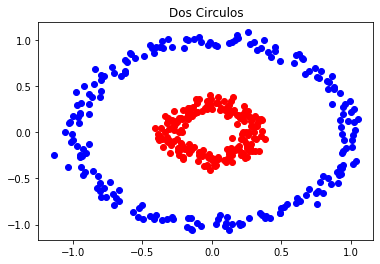

In [61]:
# Datos
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 


# plot de los circulos
plt.title('Dos Circulos')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   # 'ro' es mas o menos color rojo y marker 'o'
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.show()

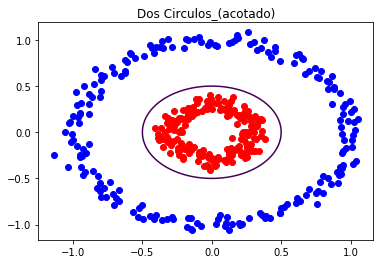

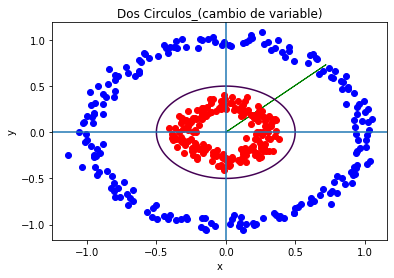

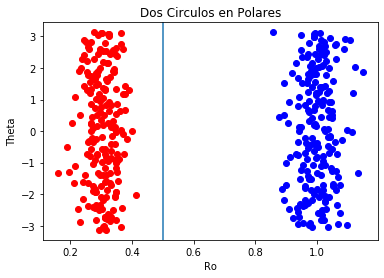

In [62]:
# plot de los circulos con el umbral 

plt.title('Dos Circulos_(acotado)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
x=np.linspace(-1.0, 1.0, 100)  # para circunferencia umbral
y=np.linspace(-1.0, 1.0, 100)
z, t=np.meshgrid(x,y)
F=(z)**2+(t)**2-0.25
plt.contour(z,t,F,[0])
plt.show();


# Para polares
plt.title('Dos Circulos_(cambio de variable)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.axvline(x=0.0)  # sistema coordenadas
plt.axhline(y=0.0)
plt.arrow(0,0,0.72,0.73, color='g')  # vector
plt.contour(z,t,F,[0])    # circunferencia r=0.5
plt.xlabel('x')
plt.ylabel('y')

# En polares
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


def polar_carte(ro, theta):  # definicion coordenadas polares, convierte polares en cartesianas
    x=ro*np.cos(theta)
    y=ro*np.sin(theta)
    return(x, y)

def carte_polar(x, y):       # convierte cartesianas en polares
    ro=np.sqrt(x**2+y**2)
    theta=np.arctan2(y, x)
    return(ro, theta)


# plot en polares
c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 
plt.figure(5)
plt.title('Dos Circulos en Polares')
plt.plot(carte_polar(X[c_interno, 0], X[c_interno, 1])[0],carte_polar(X[c_interno, 0], X[c_interno, 1])[1], 'ro')    # circulo interno
plt.plot(carte_polar(X[c_externo, 0], X[c_externo, 1])[0], carte_polar(X[c_externo, 0], X[c_externo, 1])[1], 'bo')   # circulo externo
plt.axvline(x=0.5)          # umbral, recta vertical en x=0.5
plt.xlabel('Ro')
plt.ylabel('Theta')
plt.show();

**Kernel Trick**

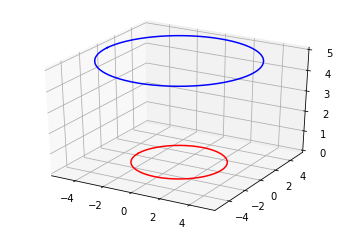

In [63]:
ang=np.linspace(-np.pi, np.pi, 200)


x=3*np.cos(ang)
y=3*np.sin(ang)
z=0  # en realidad, la coordenada z=x^2+y^2


x_1=5*np.cos(ang)
y_1=5*np.sin(ang)
z_1=5


fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot(x, y, z, color='r')
ax.plot(x_1, y_1, z_1, color='b')
plt.show();

###### SVM

![](data/svm.png)

Genera un hiperplano (n-1)dimensional para separar los datos. Este primer plano es el llamado clasificador lineal (maximizando la distancia a los puntos).

$$\vec{\omega}\vec{x}-b=0$$

donde :

$\omega$ es el vector normal al plano
$x$ son los datos
$b$ es el sesgo

**Función a minimizar**

$$[\frac{1}{n}\sum_{i=1}^{n}max(0, 1-y_i(\vec{\omega}\vec{x}-b))] + \lambda \|\vec{\omega}\|$$

In [64]:
import warnings
warnings.simplefilter('ignore')

In [65]:
from sklearn.svm import SVR  # Support Vector Regressor

In [66]:
svr=SVR()
svr.fit(X_train, y_train)
#y_pred=svr.predict(X_test)

train_score=svr.score(X_train, y_train)    # R2
test_score=svr.score(X_test, y_test)

print (train_score, test_score)

0.1541118172180571 -0.014745946629719953


In [67]:
from sklearn.metrics import r2_score

In [68]:
y_pred_train=svr.predict(X_train)

y_pred_test=svr.predict(X_test)

In [72]:
r2_score(y_train, y_pred_train)

0.1541118172180571

In [71]:
r2_score(y_test, y_pred_test)

-0.014745946629719953

### Random Forest

![](data/RF.jpg)

Arboles de decisión.

+ Pros:

Modelos sencillos, se pueden visualizar. No necesitan preprocesar mucho los datos. Computacionalmente eficientes.

+ Contras:

Muy sensibles a pequeñas variaciones de los datos de entrada. Muy sensible a datos no balanceados. Muy dado al overfitting (poco sesgo, mucha varianza), más cuanto más profundo sea.

**Entropía de información**

$$H(x) = -\sum_i p_ilog(p_i)$$

$$H(x) = -\sum_i p_ilog(p_i) + (1-p_i)log(1-p_i)$$

**Bagging**

Bootstrap aggregating.

Muestreo aleatorio con reemplazamiento y de manera uniforme. Después se hace la media. Además RF coge para cada árbol un subconjunto de características de manera aleatoria (feature bagging), esto se hace para evitar la correlación entre árboles dentro del bosque.

**Extratrees**

Extremely randomized trees.

Tiene básicamente 2 diferencias:
+ Cada árbol usa todo el train (no bootstrap)
+ El spliteo hacia abajo es random (no minimizando entropia)

In [73]:
# Rf

from sklearn.ensemble import RandomForestRegressor as RFR

In [74]:
rfr=RFR()
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)

0.9585348423423392 0.7504919102434192


In [78]:
rfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [81]:
rfr=RFR(n_estimators=243)
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)

0.9798958279463937 0.7715931266168896


In [75]:
# Extra trees

from sklearn.tree import ExtraTreeRegressor as ETR

In [76]:
etr=ETR()
etr.fit(X_train, y_train)

train_score=etr.score(X_train, y_train)    # R2
test_score=etr.score(X_test, y_test)

print (train_score, test_score)

1.0 0.7222906547823724


In [77]:
etr

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

## GridSearching  -  CrossValidation

![](data/grid.png)

![](data/cv.ppm)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


def grid(modelo, param, cv=5):
    grid=GridSearchCV(modelo, param, cv=cv, 
                      iid=True, return_train_score=True, n_jobs=-1)
    
    grid.fit(X_train, y_train)
    
    print('Acierto test: {:.2f}'.format(grid.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(grid.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(grid.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(grid.best_score_))
    
    return grid.best_estimator_.fit(X_train, y_train)

In [83]:
param={'max_leaf_nodes':[5,10,20], 'n_estimators':[10,50,100,500]}

In [84]:
grid(rfr, param)

Acierto test: 0.76
Acierto train: 0.93
Mejores parametros: {'max_leaf_nodes': 20, 'n_estimators': 50}
Mejor acierto cv: 0.83


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [85]:
modelo=grid(rfr, param)

Acierto test: 0.74
Acierto train: 0.93
Mejores parametros: {'max_leaf_nodes': 20, 'n_estimators': 500}
Mejor acierto cv: 0.83


In [86]:
modelo.predict(X_test)

array([20.42117313, 22.06979802, 20.62852385, 15.21882017, 20.40236067,
       20.60045465, 20.86664771, 23.73293052, 18.14183858, 19.64564085,
       14.83331013, 34.48957723, 24.38921846, 34.08124548, 22.02739201,
       12.25939782, 29.92058854, 12.73858081, 20.46823635, 28.4633741 ,
       18.43948068, 45.32323079, 16.32256017, 15.61739133, 15.7325663 ,
       24.0988864 , 46.8903057 , 18.62505565, 22.85922316, 15.96690566,
       30.46747601, 32.95095994, 14.56891569, 46.12539738, 27.94320187,
       25.40163595, 20.51578933, 23.35330648, 20.46032894, 16.63019178,
       20.56248464, 24.11407915, 13.4112578 , 20.76128048, 27.16428268,
       46.28627914, 11.40846441, 18.12628665, 20.92896964, 24.06967555,
       34.21929939, 21.56360216, 20.58068895, 24.19555651, 20.90060339,
       28.08092777, 18.39134519, 12.89299685, 19.40419296, 20.94516233,
       44.56113203, 46.8426369 , 21.90653855, 20.65818281, 13.13531663,
       32.26219672, 32.99168775, 21.23987597,  9.83367953, 16.05

# Clasificación (se busca una clase)

### Regresión Logística   (SoftMax)


**Con datos del MNIST, clasificación de números escritos a mano. (1vsALL)**


![](data/sig_plot.png)


##### Versión Custom

In [19]:
import time                                                 # para tiempo
inicio=time.time()                                          # momento inicial
print ('Comenzando...\n')
print ('Modelo SoftMax (MLR) : Numeros')    
import pandas as pd                                         # dataframe
import numpy as np                                          # numerical python, algebra lineal

import matplotlib.pyplot as plt                             # plots, graficos
import seaborn as sns                                       # plots

from sklearn.metrics import confusion_matrix                # metricas, matriz de confusion
from scipy.optimize import minimize                         # minimizar, opt

import warnings                                             # avisos
warnings.filterwarnings('ignore', category=RuntimeWarning)  # elimino un warning por valores NaN en logaritmos o /0

Comenzando...

Modelo SoftMax (MLR) : Numeros


**Se crean las funciones de las ecuaciones principales del modelo.**

![](data/sigmoide.png)

In [20]:
def f(X,a):                                 # funcion logistica, sigmoide, funcion del modelo, con z=X*alfa, el producto escalar
    return 1.0/(1.0+np.exp(-np.dot(X,a)))   # Boltzmann con pivote, alfa[i]=0

![](data/coste.png)

In [21]:
def coste(X,a,y,lambda_reg):              # funcion coste, funcion a minimizar 
    return -(np.sum(np.log(f(X,a)))+np.dot((y-1).T,(np.dot(X,a))))/y.size + lambda_reg/(2.0*y.size)*np.dot(a[1:],a[1:])

![](data/grad_coste.png)

In [22]:
def grad_coste(X,a,y,lambda_reg):          # gradiente de la funcion coste con regularizacion
    return (np.dot(X.T,(f(X,a)-y)))/y.size + lambda_reg/(2.0*y.size)*np.concatenate(([0], a[1:])).T

**Para normalizar los datos.**

In [23]:
def normalizador(X):                # normalizador de X
    X_media=X.mean(axis=0)          # media de X
    X_std=X.std(axis=0)             # desviacion estandar de X
    X_std[X_std==0]=1.0             # si hay alguna std=0 ponla a 1
    X=(X-X_media)/X_std             # normaliza
    
    X=np.insert(X, 0, 1, axis=1)    # esta linea añade una columna de 1, feature engineering [1, f1, f2.., fn, f1f2...] (mejora un 10%)
    
    return X

**Se cargan los datos.**

In [24]:
datos=pd.read_csv('data/train_Mnist.csv')        # imagenes de numeros
print ('Datos leidos...')
display(datos.head())
matriz_datos=datos.values   
print ('Dimensiones matriz de datos: {}'.format(matriz_datos.shape))   

Datos leidos...


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dimensiones matriz de datos: (42000, 785)


**Se visualiza una de las imagenes**

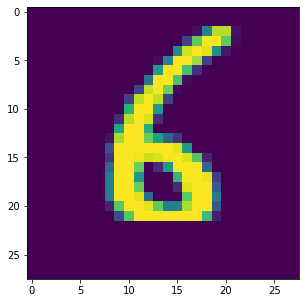

In [25]:
plt.figure(figsize=(5,5))
plt.imshow(matriz_datos[45,1:].reshape(28,28))  
plt.show()

**Creacion de la matriz Y (variable dependiente, a predecir), (onehot)**

In [26]:
Y=np.zeros((matriz_datos.shape[0],10))   
print ('Dimension de Y: {}'.format(Y.shape))  
print ('')
for i in range(10):
    Y[:,i]=np.where(matriz_datos[:,0]==i,1,0)
print(Y[0:10,:]) # 10 primeras filas

Dimension de Y: (42000, 10)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


**Se separan las columnas etiqueta y se quitan las columnas que sean todo ceros.**

In [27]:
etiquetas=matriz_datos[:,0]        # etiqueta, el numero en si, 42000 etiquetas
X=matriz_datos[:,1:]               # datos numericos de los pixeles, cada columna es un pixel (variables indep)
print ('Dimension original de X: {}'.format(X.shape)) 
print ('')
X=X[:,X.sum(axis=0)!=0]            # se quitan las columnas=0 (la suma de los elementos es no nulo, no hay informacion)
print ('Dimension limpia de X: {}'.format(X.shape)) 

Dimension original de X: (42000, 784)

Dimension limpia de X: (42000, 708)


**Se dividen los datos en train y test.**

In [28]:
X_train, Y_train=X[0:30000,:], Y[0:30000,:]        # datos de entranamiento
X_train_sk=X_train.copy()                          # para sklearn

X_test, Y_test=X[30000:,:], Y[30000:,:]            # datos de test
X_test_sk=X_test.copy()                            # para sklearn

print ('Dimensiones train: X={}, Y={}'.format(X_train.shape, Y_train.shape))  
print ('')
print ('Dimensiones test: X={}, Y={}'.format(X_test.shape, Y_test.shape))

Dimensiones train: X=(30000, 708), Y=(30000, 10)

Dimensiones test: X=(12000, 708), Y=(12000, 10)


**Etiquetas train y test.**

In [29]:
etiquetas_train=etiquetas[0:30000]       # etiquetas para entranamiento
etiquetas_test=etiquetas[30000:]         # etiquetas para test

print ('Dimensiones etiquetas train: {}'.format(etiquetas_train.shape))
print ('')
print ('Dimensiones etiquetas test: {}'.format(etiquetas_test.shape))

Dimensiones etiquetas train: (30000,)

Dimensiones etiquetas test: (12000,)


**Normaliza los datos.**

In [30]:
X_train=normalizador(X_train)
X_test=normalizador(X_test)
print ('Datos normalizados.')

Datos normalizados.


**Se buscan los parametros optimos para los 10 modelos.**

In [31]:
val_inicial=np.random.rand(X_train.shape[1]) # valores iniciales de los parametros alfa

A_opt=np.zeros((X_train.shape[1],10))        # se crea la matriz para los parametros optimizados, alfas

**Término de regularización L2.**

In [32]:
lambda_reg=100.            # valor obtenido desde gridsearching  

**Optimización.**

In [33]:
inicio_opt=time.time()                       # inicio optimizacion
for i in range(10):
    print ('\n\nOptimizando {} frente al resto.'.format(i))

    def opt_coste(a):                        # funcion a minimizar
        return coste(X_train, a, Y_train[:,i], lambda_reg) 

    def opt_grad_coste(a):                   # gradiente 
        return grad_coste(X_train, a, Y_train[:,i], lambda_reg)	

    # metodo Nelder-Mead, Powell, CG, BFGS, Newton-CG, L-BFGS-B, TNC, COBYLA, SLSQP, trust-constr, 
    # dogleg, trust-ncg, trust-exact, trust-krylov (tambien custom)            
    metodo='trust-constr'
    print ('Optimizacion {}...'.format(metodo)) # minimizacion, optimizacion
    i_opt=time.time() 
    modelo=minimize(opt_coste, val_inicial, method=metodo, jac=opt_grad_coste, tol=1e-4, options={'disp':True}) 
    print ('Hecho.')
    print ("Tiempo optimizacion: {:.2f} segundos." .format(time.time()-i_opt))  
    A_opt[:,i]=modelo.x

t_custom=time.time()-inicio_opt   # tiempo desde inicio hasta final minimizacion
print ('\nTiempo total optimizacion custom: {:.2f} segundos.\n' .format(t_custom)) 



Optimizando 0 frente al resto.
Optimizacion trust-constr...
`gtol` termination condition is satisfied.
Number of iterations: 61, function evaluations: 61, CG iterations: 343, optimality: 9.12e-05, constraint violation: 0.00e+00, execution time:  2.3 s.
Hecho.
Tiempo optimizacion: 2.34 segundos.


Optimizando 1 frente al resto.
Optimizacion trust-constr...
`gtol` termination condition is satisfied.
Number of iterations: 49, function evaluations: 49, CG iterations: 230, optimality: 9.97e-05, constraint violation: 0.00e+00, execution time:  1.8 s.
Hecho.
Tiempo optimizacion: 1.86 segundos.


Optimizando 2 frente al resto.
Optimizacion trust-constr...
`gtol` termination condition is satisfied.
Number of iterations: 59, function evaluations: 59, CG iterations: 326, optimality: 8.53e-05, constraint violation: 0.00e+00, execution time:  2.2 s.
Hecho.
Tiempo optimizacion: 2.25 segundos.


Optimizando 3 frente al resto.
Optimizacion trust-constr...
`gtol` termination condition is satisfied.
N

**Ahora se chequea el modelo.**

In [34]:
y_pred=[]                  # etiquetas predichas
y_prob=[]                  # probabilidades de las etiquetas predichas

def resumen(datos):        # testeo
    for e in datos:
        nombre, etiqueta, Xs=e         
        etiq=etiqueta.size
        probs=np.zeros((etiq,2))      # etiquetas con su probabilidad
        cuenta=0                      # conteo de aciertos
        for muestra in range(etiq): 
            for n in range(10):
                alfa=A_opt[:,n]       # parametros de softmax
                probs[n,0]=n
                probs[n,1]=f(Xs[muestra,:],alfa)      # evaluacion de la prediccion
                
            probs=probs[probs[:,1].argsort()[::-1]]   # se pone la prob mas alta al principio
            y_pred.append(probs[0,0])
            y_prob.append(probs[0,1])
            if probs[0,0]==etiqueta[muestra]:         # si se acierta +1
                cuenta+=1
        print ("\n{}".format(nombre))
        print ("{} correctos de {} ==> {:.4}% correcto".format(cuenta, etiq, cuenta/etiq*100))

**Resultados train y test Custom.**

In [35]:
resumen([('Entranamiento  :', etiquetas_train, X_train)])
resumen([('Test  :', etiquetas_test, X_test)])


Entranamiento  :
27949 correctos de 30000 ==> 93.16% correcto

Test  :
10980 correctos de 12000 ==> 91.5% correcto


**Se guarda el entrenamiento, los alfas, en un csv.**

In [36]:
print ('Dimensiones matriz de parametros={}'.format(A_opt.shape))
df=pd.DataFrame(A_opt, columns=[i+1 for i in range(A_opt.shape[1])])  # se guardan los parametros softmax en csv
#df.to_csv('alfas.csv', index=False)

Dimensiones matriz de parametros=(709, 10)


###### Versión SkLearn

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
ini_opt_sk=time.time()
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70,
                          solver='lbfgs', multi_class='multinomial').fit(X_train_sk, etiquetas_train)
t_sklearn=time.time()-ini_opt_sk
print ('\nTiempo total optimizacion sklearn: {:.2f} segundos.\n' .format(t_sklearn))


Tiempo total optimizacion sklearn: 5.55 segundos.



**Chequeo modelo sklearn.**

In [39]:
def resumen_sk(datos):
    for e in datos:
        nombre, etiqueta, Xs=e
        etiq=etiqueta.size
        
        y_pred_sk=logreg.predict(Xs)
        
        cuenta=0
        for muestra in range(etiq):
            if y_pred_sk[muestra]==etiqueta[muestra]:         
                cuenta+=1
        
        print ("\n{}".format(nombre))
        print ("{} correctos de {} ==> {:.4}% correcto".format(cuenta, etiq, cuenta/etiq*100))

**Resultados train y test Custom.**

In [40]:
resumen_sk([('Entranamiento  :', etiquetas_train, X_train_sk)])
resumen_sk([('Test  :', etiquetas_test, X_test_sk)])


Entranamiento  :
28108 correctos de 30000 ==> 93.69% correcto

Test  :
11014 correctos de 12000 ==> 91.78% correcto


**Comparacion en tiempo**

In [41]:
print ('SkLearn es {:.2f} veces más rapido.'.format(t_custom/t_sklearn))

SkLearn es 4.06 veces más rapido.


**Diferencia absoluta entre ambos modelos.**

In [42]:
y_pred_sk=logreg.predict(X_test_sk)
comp=[y_pred[30000:][i]==y_pred_sk[i] for i in range(len(y_pred[30000:]))]
n_equal=len([e for e in comp if e==False])/len(y_pred_sk)

print ('Hay una diferencia entre ambos modelos del {:.2f}%.'.format(n_equal*100))

Hay una diferencia entre ambos modelos del 4.86%.


**Acierto en train y test de ambos modelos.**

In [43]:
resumen([('Entranamiento Custom:', etiquetas_train, X_train)])
resumen([('Test Custom:', etiquetas_test, X_test)])
print ('')
resumen_sk([('Entranamiento SkLearn:', etiquetas_train, X_train_sk)])
resumen_sk([('Test SkLearn:', etiquetas_test, X_test_sk)])


Entranamiento Custom:
27949 correctos de 30000 ==> 93.16% correcto

Test Custom:
10980 correctos de 12000 ==> 91.5% correcto


Entranamiento SkLearn:
28108 correctos de 30000 ==> 93.69% correcto

Test SkLearn:
11014 correctos de 12000 ==> 91.78% correcto


# Arboles RFC

In [88]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC

In [90]:
dtc=DTC(criterion='entropy')

dtc.fit(load_iris().data, load_iris().target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(418.5, 747.4499999999999, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 611.55, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 611.55, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 475.65, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 339.74999999999994, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 203.8499999999999, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 203.8499999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 339.74999999999994, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 203.8499999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 203.8499999999999, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = 

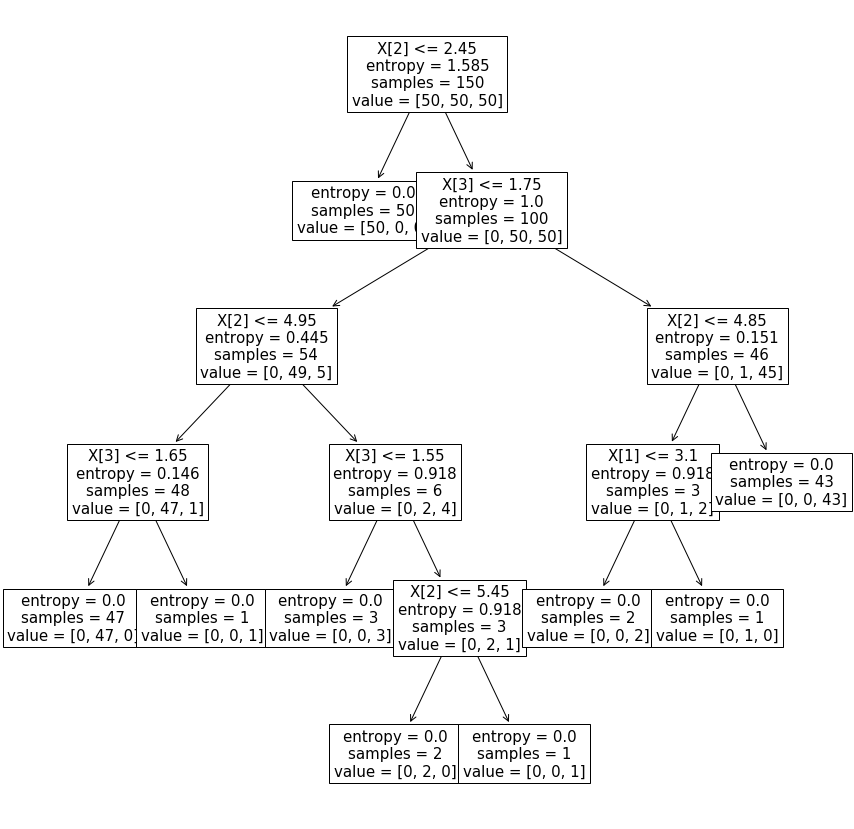

In [91]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(dtc, fontsize=15)

In [92]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [93]:
rfc=RFC()
rfc.fit(load_iris().data, load_iris().target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rfc.score(load_iris().data, load_iris().target)

0.9933333333333333

# SVC

In [96]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(load_iris().data, load_iris().target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [97]:
X=load_iris().data
y=load_iris().target

In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Random GridSearching

In [103]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [117]:
X[:10]

array([[-0.38289117, -0.09084004],
       [-0.02096229, -0.47787416],
       [-0.39611596, -1.28942694],
       [-0.61813018, -0.06383715],
       [ 0.70347838, -0.18703837],
       [-0.45970463,  0.69477465],
       [-0.45091682, -0.71570524],
       [-0.45562004, -0.13406016],
       [-0.26513904,  0.40812871],
       [-0.15474648,  0.41406973]])

In [118]:
y[:10]

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [106]:
n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]

max_features=['auto', 'sqrt']

min_samples_split=[2, 5, 10]

bootstrap=[True, False]

In [107]:
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'min_samples_split':min_samples_split,
             'bootstrap': bootstrap}

In [108]:
rfc=RFC()

In [110]:
rf_random=RandomizedSearchCV(estimator=rfc, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             verbose=10,
                             n_jobs=-1, 
                             scoring='roc_auc')

In [111]:
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [112]:
rf_random.best_estimator_#.fit()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
rf_random.best_score_

0.8849264705882353

In [114]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_features': 'auto',
 'bootstrap': True}

In [115]:
rf_random.cv_results_

{'mean_fit_time': array([4.85194985, 2.94077675, 4.22733831, 1.77659146, 4.05328306,
        3.24560078, 1.81565968, 1.32345327, 4.5181915 , 0.42051816,
        3.65153964, 2.37602075, 0.40813231, 3.96605873, 1.31854892,
        4.30434299, 2.3713177 , 1.89355922, 0.36347906, 1.94606328,
        3.0379734 , 2.23947851, 0.42003735, 2.30339074, 0.99044204,
        1.90986451, 1.99570966, 1.560697  , 1.10795903, 1.72875341,
        2.72398869, 2.86464794, 3.21197557, 0.27629638, 0.80506516,
        2.18842769, 0.44557047, 2.58026767, 1.67864331, 1.20978928,
        3.49558743, 2.09274666, 1.41981292, 0.84121235, 3.25514325,
        1.62192504, 0.96667775, 1.2577703 , 1.33177964, 1.22911541,
        1.69127266, 1.0588994 , 1.74259265, 1.89295117, 0.27290964,
        1.23911897, 2.86443011, 2.37864669, 0.92049034, 4.44891874,
        2.89014101, 1.42541536, 2.90877295, 0.30344836, 3.09527095,
        3.62927222, 0.57095122, 3.09758878, 1.89340941, 2.27684474,
        2.33264883, 2.26278194,